# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [2]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

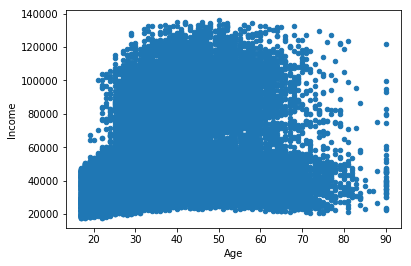

In [3]:
income.plot(x='Age', y='Income', kind='scatter')

In [4]:
y = income['Income'].values
x = income['Age'].values


Text(0, 0.5, 'Income')

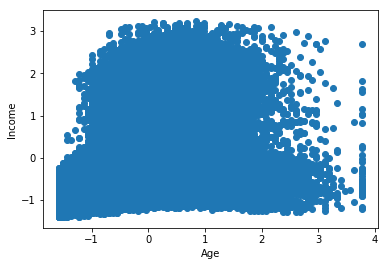

In [5]:
y_mean, y_std = y.mean(), y.std()
x_mean, x_std = x.mean(), x.std()

y_s = (y - y_mean)/ y_std
x_s = (x - x_mean)/ x_std

plt.scatter(x_s, y_s)
plt.xlabel('Age')
plt.ylabel('Income')

Con base en las graficas anteriores, se evidencia que no existe una relacion visible entre las variables edad e ingreso. En la primera grafica con los valores originales se nota una dispersion de los datos que no permite marcar un patron o linea de tendencia. En la segunda grafica se estandarizan los datos, sin embargo, la dispersion permanece y no se logra describir algun tipo de relacion.

In [6]:
n_samples = x.shape[0]
x_ = np.c_[np.ones(n_samples), x]
x

array([39, 50, 38, ..., 58, 22, 52], dtype=int64)

In [7]:
#Using OLS method
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_,income['Income'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
linreg.coef_

array([  0.        , 542.16765707])

In [9]:
#Using (Stochastic) Gradient Descent

from sklearn.linear_model import SGDRegressor
linreg2 = SGDRegressor(fit_intercept=False, max_iter=500,tol = 0.0000001)
linreg2.fit(x_, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=False, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=500,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=1e-07, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [10]:
linreg2.coef_

array([32614.51617881,   419.25339212])

In [11]:
print('With OLS method, a 1 unit increase in ''Age'' is associated with:', linreg.coef_[1],'unit increase in Income')
print('With Gradient descent method, a 1 unit increase in ''Age'' is associated with:', linreg2.coef_[1],'unit increase in Income')

With OLS method, a 1 unit increase in Age is associated with: 542.1676570723876 unit increase in Income
With Gradient descent method, a 1 unit increase in Age is associated with: 419.2533921233755 unit increase in Income


In [12]:
#Predic for Age equal 30 and 40
x_pred = np.c_[np.ones(2),[30,40]]
#p = p.reshape(1,1)
print(x_pred)

[[ 1. 30.]
 [ 1. 40.]]


In [53]:
Income_pred = income.Income[:,np.newaxis]
#Income_pred.shape
x = x.reshape(32561,1)

In [54]:
income[['Income_pred']] = linreg.predict(x.reshape(32561,1))

ValueError: shapes (32561,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

In [55]:
y_pred = linreg.predict(x_pred.reshape(2,-1))

print('Income for Age = 30 :  ',y_pred[0])
print('Income for Age = 40 :  ',y_pred[1])

Income for Age = 30 :   48803.11784304026
Income for Age = 40 :   54224.79441376413


# Exercise 4.2
Evaluate the model using the MSE

In [22]:
from sklearn import metrics
import numpy as np

#income['Income'].shape
y_pred.shape

#print('MSE:', metrics.mean_squared_error(income['Income'], y_pred))

(2,)


# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [23]:
income['Age2'] = income['Age']**2

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income,Age2
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0,1521
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0,2500
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0,1444
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0,2809
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0,784


In [24]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()


In [25]:
ols.fit(income[['Age','Age2']], income['Income'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
y_pred2 = ols.predict(x_pred.reshape(2,-1))
y_pred2

array([-14009.60314493, -14315.03724905])

# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [27]:
x_2 = income[['Age','Education-Num','Hours per week']]

In [28]:
ols_2 = LinearRegression()
ols_2.fit(x_2,income['Income'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
y_pred3 = ols_2.predict(x_2)
y_pred3

array([64752.62100678, 58540.30962936, 48808.0276557 , ...,
       58584.67500419, 32401.91909611, 55651.68079964])

# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [30]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [31]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Exercise 4.5

Create Y and X

What is the distribution of the churners?

Split the data in train (70%) and test (30%)


In [32]:
data.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [33]:
# Remove character '?' 
data.rename(columns = {'Churn?':'Churn'}, inplace=True)

In [34]:
# Add variable CH type float 
data['CH'] = data.Churn.map({'False.':0, 'True.':1})
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn,CH
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0


In [35]:
#Create X and Y

X = data[['Account Length','VMail Message','Day Calls','Night Calls','Intl Calls','CustServ Calls']]
y = data.CH

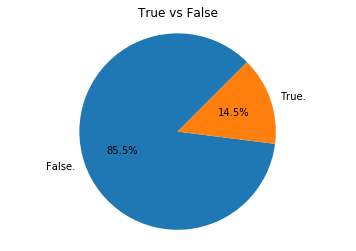

In [36]:
#Pie Chart churners
data[['Churn','Phone']].groupby('Churn').count()['Phone'].plot.pie(autopct='%1.1f%%', label='',startangle=45)
plt.title('True vs False')
plt.axis('equal')
plt.show()

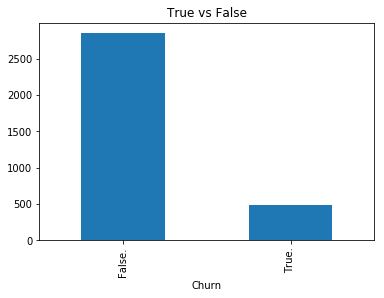

In [37]:
#Bar Chart churners
data[['Churn','Phone']].groupby('Churn').count()['Phone'].plot(kind = 'bar')
plt.title('True vs False')
plt.show()

De acuerdo con la distribucion de los churners, se hace evidente una alta concentracion de valores 'False' en la variable 'Churn'

In [38]:
train = data.iloc[:int(len(data)*.70)]
test = data.iloc[int(len(data)*.70):]


print('Train dataset size (%)')
print (len(train)*100/len(data))

print('Test dataset size (%)')
print (len(test)*100/len(data))

Train dataset size (%)
69.99699969996999
Test dataset size (%)
30.003000300030003


In [39]:
train.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn,CH
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0


In [40]:
test.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn,CH
2333,NM,16,510,367-9259,no,no,0,144.8,84,24.62,...,14.02,231.5,75,10.42,8.2,4,2.21,2,False.,0
2334,AL,119,415,404-8765,no,no,0,98.8,97,16.80,...,12.49,190.7,105,8.58,10.0,4,2.70,3,False.,0
2335,MN,124,510,371-6284,yes,no,0,157.8,71,26.83,...,17.27,168.7,82,7.59,10.0,2,2.70,3,True.,1
2336,NY,122,415,403-9468,no,yes,37,163.0,107,27.71,...,26.59,200.0,85,9.00,11.6,5,3.13,1,False.,0
2337,MD,139,415,335-3133,no,no,0,181.6,119,30.87,...,28.53,149.8,64,6.74,8.3,6,2.24,4,False.,0


# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

In [41]:
X_train = train[['Account Length','VMail Message','Day Calls','Night Calls','Intl Calls','CustServ Calls']]
y_train = train.CH
X_test = test[['Account Length','VMail Message','Day Calls','Night Calls','Intl Calls','CustServ Calls']]
y_test = test.CH

In [46]:
# fit a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)

logreg.fit(X_train, y_train)
y_pred_2 = logreg.predict(X_test)

print(y_pred_2[0:100])
print(y_test[0:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
2333    0
2334    0
2335    1
2336    0
2337    0
2338    0
2339    0
2340    0
2341    0
2342    0
2343    1
2344    0
2345    0
2346    0
2347    1
2348    0
2349    0
2350    0
2351    0
2352    0
2353    0
2354    1
2355    0
2356    1
2357    1
2358    0
2359    0
2360    0
2361    0
2362    0
       ..
2403    0
2404    0
2405    1
2406    0
2407    1
2408    0
2409    0
2410    0
2411    0
2412    1
2413    0
2414    0
2415    1
2416    0
2417    0
2418    0
2419    1
2420    1
2421    1
2422    0
2423    0
2424    0
2425    0
2426    0
2427    0
2428    1
2429    0
2430    0
2431    0
2432    1
Name: CH, Length: 100, dtype: int64


# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set


In [43]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[829,   2],
       [163,   6]], dtype=int64)

In [44]:
#Accuracy 

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.835

In [45]:
accuracy_score(y_test, y_pred, normalize=False)

835

El accuracy calcula la división entre el total de la suma de verdaderos negativos y verdaderos positivos, y el total de los casos a estudiar. Por lo cual un valor igual a 1 (entre caso) o a 100 (en el segundo) equivale al valor más alto, en el cual el modelo predice perfectamente. Mientras que un valor igual a 0 equivale a no haber predecido ningún valor correctamente.

De este modo se puede concluir que el modelo tiene un accuracy muy bueno, en donde se predice correctamente en el 83% de los casos